
#Breast Cancer Classification

Hi, I'm Arpita 💁‍♀️ and this notebook showcases the training of multiple machine learning models on the Breast Cancer dataset, along with performance evaluation and hyperparameter tuning to identify the best model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

##Load and Explore the Dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.shape)
X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Data Preprocessing

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##Train Multiple ML Models

In [4]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021
1,Random Forest,0.964912,0.958904,0.985915,0.972222
2,SVM,0.973684,0.972222,0.985915,0.979021
3,KNN,0.947368,0.957746,0.957746,0.957746


##Hyperparameter Tuning with GridSearchCV

In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

tuned_result = pd.DataFrame([{
    'Model': 'Tuned Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}])

results_df = pd.concat([results_df, tuned_result], ignore_index=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021
1,Random Forest,0.964912,0.958904,0.985915,0.972222
2,SVM,0.973684,0.972222,0.985915,0.979021
3,KNN,0.947368,0.957746,0.957746,0.957746
4,Tuned Random Forest,0.956140,0.958333,0.971831,0.965035


##Final Model Comparison

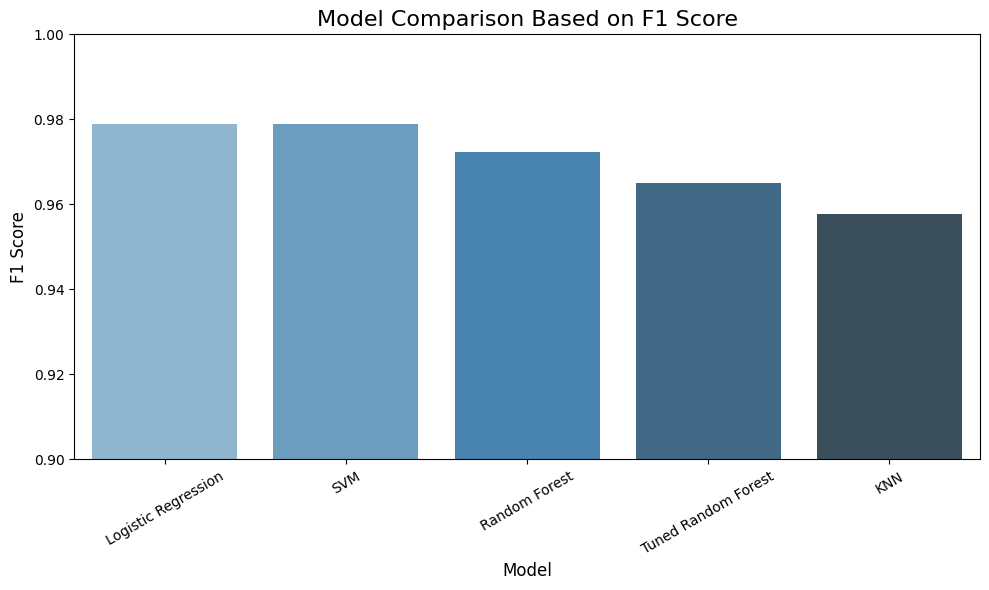

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by F1 Score
results_df_sorted = results_df.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df_sorted, x='Model', y='F1 Score', palette='Blues_d')
plt.title("Model Comparison Based on F1 Score", fontsize=16)
plt.ylabel("F1 Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()


##Conclusion

- Logistic Regression and SVM gave the best performance with an F1 Score of **97.90%**.
- Hyperparameter tuning improved Random Forest slightly but not enough to outperform others.
- The final recommendation would be to go with **Logistic Regression or SVM** for this dataset.
